# Data Preparation

### 1. Load the Data from Google Sheets

In [111]:
# Import python library gspread to read the Google Sheet
import gspread

# Import gspread dataframe to get the data as a dataframe
import gspread_dataframe
from gspread_dataframe import get_as_dataframe

# Import pandas to extract the data
import pandas as pd

# Import numpy to manipulate the data
import numpy as np

In [112]:
# Use the service_account method to give service account details to gspread
sa = gspread.service_account(filename="extended-pagoda-419111-6c5d3c5c6b77.json")

# Use the sa gspread client to connect to the Google Sheet
sheet = sa.open("2024: Body Composition Tracking")

# Use the worksheet method to define worksheet to read
worksheet = sheet.worksheet("Weighings")

# Use the get_as_dataframe method to get the data as a dataframe
# Specify that the first column in the data should be used as the index, includes dates and is formatted day first
df = get_as_dataframe(worksheet, index_col=0, parse_dates=True, dayfirst=True)

# Drop rows that are entirely null
df = df.dropna(how='all')

# Review the first 5 rows of the dataframe
df.head()

,TIME,WEIGHT,BMI,BODY FAT,FAT-FREE BODY WEIGHT,SUB FAT,VIS FAT,BODY WATER,SKE MUSCLE,MUSCLE MASS,BONE MASS,PROTEIN,BMR,AGE
DATE,,,,,,,,,,,,,,
2023-11-01,07:03,167.4,24.8,0.241,127.1,0.162,9.5,0.520,0.522,119.0,6.5,0.199,1619.0,38.0
2023-11-02,07:03,166.2,24.6,0.238,126.6,0.16,9.4,0.522,0.524,118.6,6.6,0.200,1614.0,38.0
2023-11-09,07:04,166.4,24.6,0.239,126.6,0.161,9.4,0.521,0.523,118.6,6.6,0.200,1615.0,38.0
2023-11-16,07:04,166.6,24.7,0.240,126.6,0.161,9.5,0.521,0.522,118.6,6.5,0.200,1616.0,38.0
2023-11-23,07:03,165.8,24.6,0.238,126.3,0.16,9.4,0.522,0.524,118.5,6.6,0.201,1611.0,38.0


### 2. Understand the Data

In [113]:
# Review the DatetimeIndex
df.index

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-09', '2023-11-16',
               '2023-11-23', '2023-11-30', '2023-12-01', '2023-12-02',
               '2023-12-03', '2023-12-04',
               ...
               '2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29',
               '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
               '2024-04-03', '2024-04-04'],
              dtype='datetime64[ns]', name='DATE', length=128, freq=None)

In [114]:
# Review the dimensions of the dataset
df.shape

(128, 14)

In [115]:
# Review the columns of the dataset
df.columns

Index(['TIME', 'WEIGHT', 'BMI', 'BODY FAT', 'FAT-FREE BODY WEIGHT', 'SUB FAT',
       'VIS FAT', 'BODY WATER', 'SKE MUSCLE', 'MUSCLE MASS', 'BONE MASS',
       'PROTEIN', 'BMR', 'AGE'],
      dtype='object')

In [116]:
# Review the data types for each column
df.dtypes

# Note that the SUB FAT column is an object data type

TIME                     object
WEIGHT                  float64
BMI                     float64
BODY FAT                float64
FAT-FREE BODY WEIGHT    float64
SUB FAT                  object
VIS FAT                 float64
BODY WATER              float64
SKE MUSCLE              float64
MUSCLE MASS             float64
BONE MASS               float64
PROTEIN                 float64
BMR                     float64
AGE                     float64
dtype: object

In [117]:
# Review more information for each column consolidated in one view
df.info()

# Note the difference in non-null count for SUB FAT columns and the other columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2023-11-01 to 2024-04-04
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TIME                  127 non-null    object 
 1   WEIGHT                127 non-null    float64
 2   BMI                   127 non-null    float64
 3   BODY FAT              127 non-null    float64
 4   FAT-FREE BODY WEIGHT  127 non-null    float64
 5   SUB FAT               128 non-null    object 
 6   VIS FAT               127 non-null    float64
 7   BODY WATER            127 non-null    float64
 8   SKE MUSCLE            127 non-null    float64
 9   MUSCLE MASS           127 non-null    float64
 10  BONE MASS             127 non-null    float64
 11  PROTEIN               127 non-null    float64
 12  BMR                   127 non-null    float64
 13  AGE                   127 non-null    float64
dtypes: float64(12), object(2)
memory usage: 15.0+ KB


In [118]:
# Review basis statistics for all continuous variables
df.describe()

,WEIGHT,BMI,BODY FAT,FAT-FREE BODY WEIGHT,VIS FAT,BODY WATER,SKE MUSCLE,MUSCLE MASS,BONE MASS,PROTEIN,BMR,AGE
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,162.338583,24.045669,0.228976,125.155906,9.002362,0.527063,0.530000,117.293701,6.472441,0.203890,1591.842520,37.984252
std,2.077317,0.311870,0.005131,0.769627,0.208344,0.002847,0.003528,0.725253,0.065073,0.001993,11.754381,0.177471
min,158.800000,23.500000,0.220000,123.900000,8.600000,0.520000,0.522000,116.000000,6.400000,0.199000,1571.000000,36.000000
25%,160.700000,23.800000,0.225000,124.500000,8.800000,0.525000,0.527000,116.700000,6.400000,0.202000,1582.000000,38.000000
50%,162.200000,24.000000,0.229000,125.100000,9.000000,0.527000,0.530000,117.200000,6.500000,0.204000,1592.000000,38.000000
75%,163.800000,24.300000,0.233000,125.750000,9.200000,0.529000,0.533000,117.800000,6.500000,0.205000,1600.000000,38.000000
max,167.400000,24.800000,0.241000,127.100000,9.500000,0.532000,0.536000,119.000000,6.600000,0.207000,1619.000000,38.000000


In [119]:
# Review the last 5 rows of the dataset
df.tail()

,TIME,WEIGHT,BMI,BODY FAT,FAT-FREE BODY WEIGHT,SUB FAT,VIS FAT,BODY WATER,SKE MUSCLE,MUSCLE MASS,BONE MASS,PROTEIN,BMR,AGE
DATE,,,,,,,,,,,,,,
2024-03-31,09:47,160.8,23.8,0.226,124.5,0.152,8.9,0.529,0.532,116.7,6.4,0.205,1583.0,38.0
2024-04-01,07:06,161.2,23.9,0.226,124.8,0.152,8.9,0.529,0.532,117.0,6.4,0.205,1585.0,38.0
2024-04-02,08:27,160.2,23.7,0.224,124.3,0.151,8.8,0.530,0.533,116.4,6.4,0.206,1580.0,38.0
2024-04-03,07:04,160.2,23.7,0.224,124.3,0.151,8.8,0.530,0.534,116.6,6.4,0.206,1580.0,38.0
2024-04-04,07:04,159.6,23.6,0.222,124.2,0.15,8.7,0.531,0.535,116.3,6.5,0.206,1576.0,38.0


### 3. Clean the Data

In [120]:
# Look for null values
df.isnull().sum()

# Note that each column has 1 null value apart from the SUB FAT column

TIME                    1
WEIGHT                  1
BMI                     1
BODY FAT                1
FAT-FREE BODY WEIGHT    1
SUB FAT                 0
VIS FAT                 1
BODY WATER              1
SKE MUSCLE              1
MUSCLE MASS             1
BONE MASS               1
PROTEIN                 1
BMR                     1
AGE                     1
dtype: int64

In [121]:
# Find location of the null value for the TIME column
np.where(df['TIME'].isnull())[0]

array([76])

In [122]:
# Find date for the null value
df.index[76]

Timestamp('2024-02-09 00:00:00')

In [123]:
# Review data for the date with null values
df.loc["2024-02-09"]

TIME                    NaN
WEIGHT                  NaN
BMI                     NaN
BODY FAT                NaN
FAT-FREE BODY WEIGHT    NaN
SUB FAT                    
VIS FAT                 NaN
BODY WATER              NaN
SKE MUSCLE              NaN
MUSCLE MASS             NaN
BONE MASS               NaN
PROTEIN                 NaN
BMR                     NaN
AGE                     NaN
Name: 2024-02-09 00:00:00, dtype: object

In [124]:
# As none of the columns have values, drop row
df = df.dropna()

# Validate that there are no remaining null values
df.isnull().sum()

TIME                    0
WEIGHT                  0
BMI                     0
BODY FAT                0
FAT-FREE BODY WEIGHT    0
SUB FAT                 0
VIS FAT                 0
BODY WATER              0
SKE MUSCLE              0
MUSCLE MASS             0
BONE MASS               0
PROTEIN                 0
BMR                     0
AGE                     0
dtype: int64

In [125]:
# Review the updated dimensions
print(df.shape)

(127, 14)


In [126]:
# Make columns easier to work with

# Update column names to be lowercase
df.rename(columns=str.lower, inplace=True)

# Replace spaces in column names with hyphens
df.columns = df.columns.str.replace(' ', '-')

In [127]:
# Convert sub-fat column float data type
df[["sub-fat"]] = df[["sub-fat"]].astype(float)

In [128]:
# Convert bmr and age columns to integers
df[["bmr", "age"]] = df[["bmr", "age"]].astype(int)

In [129]:
# Review the updated data types for each column
df.dtypes

time                     object
weight                  float64
bmi                     float64
body-fat                float64
fat-free-body-weight    float64
sub-fat                 float64
vis-fat                 float64
body-water              float64
ske-muscle              float64
muscle-mass             float64
bone-mass               float64
protein                 float64
bmr                       int64
age                       int64
dtype: object

In [130]:
# Review updated first 5 rows
df.head()

,time,weight,bmi,body-fat,fat-free-body-weight,sub-fat,vis-fat,body-water,ske-muscle,muscle-mass,bone-mass,protein,bmr,age
DATE,,,,,,,,,,,,,,
2023-11-01,07:03,167.4,24.8,0.241,127.1,0.162,9.5,0.520,0.522,119.0,6.5,0.199,1619,38
2023-11-02,07:03,166.2,24.6,0.238,126.6,0.160,9.4,0.522,0.524,118.6,6.6,0.200,1614,38
2023-11-09,07:04,166.4,24.6,0.239,126.6,0.161,9.4,0.521,0.523,118.6,6.6,0.200,1615,38
2023-11-16,07:04,166.6,24.7,0.240,126.6,0.161,9.5,0.521,0.522,118.6,6.5,0.200,1616,38
2023-11-23,07:03,165.8,24.6,0.238,126.3,0.160,9.4,0.522,0.524,118.5,6.6,0.201,1611,38


<Axes: xlabel='DATE'>

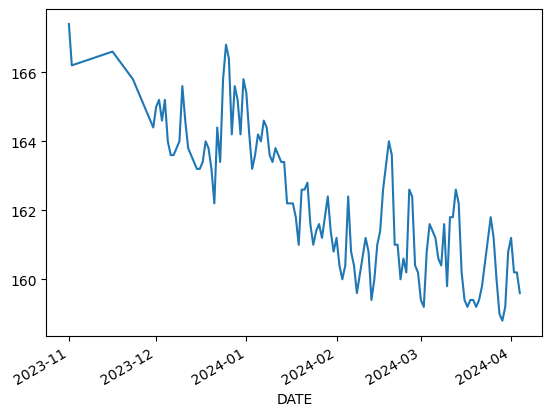

In [131]:
# Initial plot of the weight column
df.weight.plot()

In [132]:
# Save clean data as a new csv
df.to_csv('clean_df.csv')